# Linear Approximation of a Process Model using Taylor Series

by Jeffrey Kantor  (jeff at nd.edu). The latest version of this notebook is available at [https://github.com/jckantor/CBE30338](https://github.com/jckantor/CBE30338). 

### Key Idea

Process models usually exhibit some form of non-linearity due to the multiplication of an extensive flowrate and an intensive thermodynamic state variable, chemical kinetics, or various types of transport phenomenon. Near a steady-state, however, an approximate linear models often provide a 'good-enough' dynamical model for control design and analysis. Here we show how a linear approximation is constructed using a Taylor series expansion.

### Why is this Important?

As we will learn later in this course, linear models are amenable to control design and analysis. For process systems that will be operated near a steady-state, linear models provide a useful framework for control design.

## Procedure for a Single Variable System

We start with a process model that consists of a single first-order
ordinary differential equation of the form

$$\frac{dh}{dt}=f(h,q)$$

where $h$ is the state variable and $q$ is an input variable. Choose
a nominal value for the process input $q$, we'll call this nominal
value $\bar{q}$. The following procedure will produce a linear approximate
valid near the steady-state.

##### Step 1.  Find a Nominal Steady State Operating Condition
Find the steady-state value of $h$ by solving

$$0=f(\bar{h},\bar{q})$$

where $\bar{q}$ is a nominal (i.e, typical, or desired value) of a manipulated process variable.

##### Step 2. Define deviation variables
\begin{eqnarray*}
x & = & h-\bar{h}\\
u & = & q-\bar{q}
\end{eqnarray*}

##### Step 3. Taylor Series Expansion
Compute the first terms in the Taylor series and evaluate at steady-state. The higher-order terms are not needed provided the lower-order terms are non-zero and the deviations are small.
$$
f(\bar{h}+x,\bar{q}+u)\approx f(\bar{h},\bar{q})+\left.\frac{\partial f}{\partial h}\right|_{\bar{h},\bar{q}}x+\left.\frac{\partial f}{\partial q}\right|_{\bar{h},\bar{q}}u+\cdots
$$

##### Step 4. Linear Approximation
The linear approximation is 
$$
\frac{dx}{dt}=\underbrace{\left.\frac{\partial f}{\partial h}\right|_{\bar{h},\bar{q}}}_{a}x+\underbrace{\left.\frac{\partial f}{\partial q}\right|_{\bar{h},\bar{q}}}_{b}u
$$

### Example: Gravity Drained Tank

A simple model for the liquid height in a gravity-drained tank with cross-sectional area $A$ is 

$$A\frac{dh}{dt}=q_{in}-C\sqrt{h}$$

where $q_{in}$ is a volumetric inflow and $C$ is a constant associated with the drain. This is a non-linear process model that can be written

$$\frac{dh}{dt}=f(h,q_{in})$$

where

$$f(h,q_{in})=\frac{1}{A}\left(q_{in}-C\sqrt{h}\right)$$

Given a nominal inlet flowrate $\bar{q}_{in}$, the steady state value of $h$, that is $\bar{h}$, is found by solving the steady state equation

$$0=f(\bar{h},\bar{q}_{in})=\frac{1}{A}\left(\bar{q}_{in}-C\sqrt{\bar{h}}\right)$$

which gives 

$$\bar{h}=\frac{\bar{q}_{in}^{2}}{C^{2}}$$

It's interesting to note the steady-state height of the liquid in a gravity-drained tank is proportional to the square of the nominal flowrate. A 50\% increase in flowrate more than doubles the liquid height.

Let $x$ and $u$ represent the deviations from steady-state

\begin{eqnarray*}
x & = & h-\bar{h}\\
u & = & q-\bar{q}
\end{eqnarray*}

Then

\begin{eqnarray*}
\frac{d(\bar{h}+x)}{dt} & = & \frac{1}{A}\left(\bar{q}_{in}+u-C\sqrt{\bar{h}+x}\right)
\end{eqnarray*}

The Taylor series expansion 

$$f(\bar{h}+x,\bar{q}_{in}+u)\approx f(\bar{h},\bar{q}_{in})+\left.\frac{\partial f}{\partial h}\right|_{\bar{h},\bar{q}}x+\left.\frac{\partial f}{\partial q}\right|_{\bar{h},\bar{q}}u+\frac{1}{2}\left.\frac{\partial^{2}f}{\partial h^{2}}\right|_{\bar{h}}x^{2}\cdots$$

For this example 

$$\frac{dx}{dt}=\left(-\frac{C}{2A\sqrt{\bar{h}}}\right)x+\left(\frac{1}{A}\right)u$$

An alternative form of the model is found by substituting the solution for $\bar{h}$. While these have somewhat different analytical expressions for a given application they will yield identical numerical results.

$$\frac{dx}{dt}=\left(-\frac{C^{2}}{2A\bar{q}_{in}}\right)x+\left(\frac{1}{A}\right)u$$

How well does this approximation work? 

This question can be answered by comparing the results of two simulations. In the first case the simulation consists of integrating 

$$A\frac{dh}{dt}=q_{in}-C\sqrt{h}$$

as shown in the graph below. 

where $A=1$, $C=2$, initial condition $h(0)=0$, and a constant input $q_{in}=\bar{q}_{in}=1$. For these parameter values, the approximate linear model for the deviation from steady-state is given by

\begin{eqnarray*}
\frac{dx}{dt} & = & \left(-\frac{C^{2}}{2A\bar{q}_{in}}\right)x+\left(\frac{1}{A}\right)u\\
\\
 & = & -2\,x+u
\end{eqnarray*}

In terms of deviations from steady state, the input $u=q_{in}-\bar{q}_{in}=0$ and the initial conditionis $x(0)=h(0)-\bar{h}=-\bar{h}$. Plotting $h(t)$ and $x(t)+\bar{h}$ on the same axis produces the results shown in Figure \ref{fig:LinearApproximation}. 



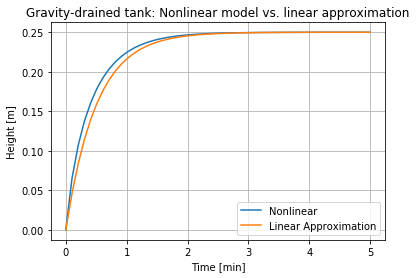

In [11]:
#Simulation of a Gravity-Drained Tank

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# parameter values
qin = 1
A = 1
C = 2

# steady state
hbar = (qin/C)**2

# nonlinear simulation
def hdot(h,t):
    return (qin - C*np.sqrt(h))/A

t = np.linspace(0,5)
h = odeint(hdot,[0],t)

# linear approximation
a = -C**2/2/A/qin
b = 1/A

def xdot(x,t):
    return a*x + b*u

u = 0
x = odeint(xdot,[-hbar],t)

# visualization
plt.plot(t,h)
plt.plot(t,x+hbar)
plt.legend(['Nonlinear','Linear Approximation'],loc='lower right')
plt.xlabel('Time [min]')
plt.ylabel('Height [m]')
plt.title('Gravity-drained tank: Nonlinear model vs. linear approximation')
plt.grid()

### Exercises

**1.** Suppose you have a tank with an cross-sectional area of 1 square meter, a steady inlet flow $\bar{q}_{in}=10$ liters/min, and observe a liquid height of 0.5 meters. What is the constant $C$? What is the characteristic time constant for the tank?

**2.** You have an elementary reaction 

$$2{\cal A}\longrightarrow Products$$

carried out under isothermal conditions in a stirred tank of volume $V$. The reaction rate is given by the expression 

$$R_{A}=k_{A}C_{A}^{2}$$

and the inlet concentration to the tank is $C_{A,in}$ at flowrate $q$. Construct a linear approximation for the dynamics of this process in the neighborhood of a steady state.